# Decision Tree Visualization
Here we take IRIS dataset and try to visualize decision tree based on the gini index

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import collections
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydot

In [2]:
# Initializing dataset
df = pd.read_excel('C:\\Users\\abhay\\PycharmProjects\\Thesis Prework (Findings)\\Datasets\\Iris Dataset.xlsx')
print(df.head())

   Sepal length in cm  Sepal width in cm  Petal length in cm  \
0                 5.1                3.5                 1.4   
1                 4.9                3.0                 1.4   
2                 4.7                3.2                 1.3   
3                 4.6                3.1                 1.5   
4                 5.0                3.6                 1.4   

   Petal width in cm  Class_label  
0                0.2  Iris-setosa  
1                0.2  Iris-setosa  
2                0.2  Iris-setosa  
3                0.2  Iris-setosa  
4                0.2  Iris-setosa  


In [3]:
# Pre-processing and cleaning dataset
def pre_process_data(dataset):
    dataset_new = dataset.copy()
    col_names = list(dataset_new.columns.values)

    columns = dataset_new.columns.values

    for column in columns:
        text_digit_values = {}

        def convert_to_int(val):
            return text_digit_values[val]

        if dataset_new[column].dtype != np.int64 and dataset_new[column].dtype != np.float64:
            column_contents = dataset[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_values:
                    text_digit_values[unique] = x
                    x += 1
            dataset_new[column] = list(map(convert_to_int, dataset[column]))
    return dataset_new

df_new = pre_process_data(df)
print(df_new.head())

   Sepal length in cm  Sepal width in cm  Petal length in cm  \
0                 5.1                3.5                 1.4   
1                 4.9                3.0                 1.4   
2                 4.7                3.2                 1.3   
3                 4.6                3.1                 1.5   
4                 5.0                3.6                 1.4   

   Petal width in cm  Class_label  
0                0.2            2  
1                0.2            2  
2                0.2            2  
3                0.2            2  
4                0.2            2  


In [4]:
x = df_new[['Sepal length in cm', 'Sepal width in cm', 'Petal length in cm', 'Petal width in cm']]
y = df_new[['Class_label']]

x = x.values
y = df_new['Class_label'].values

features = ['Sepal length in cm', 'Sepal width in cm', 'Petal length in cm', 'Petal width in cm']

In [5]:
# Classifier
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x,y)

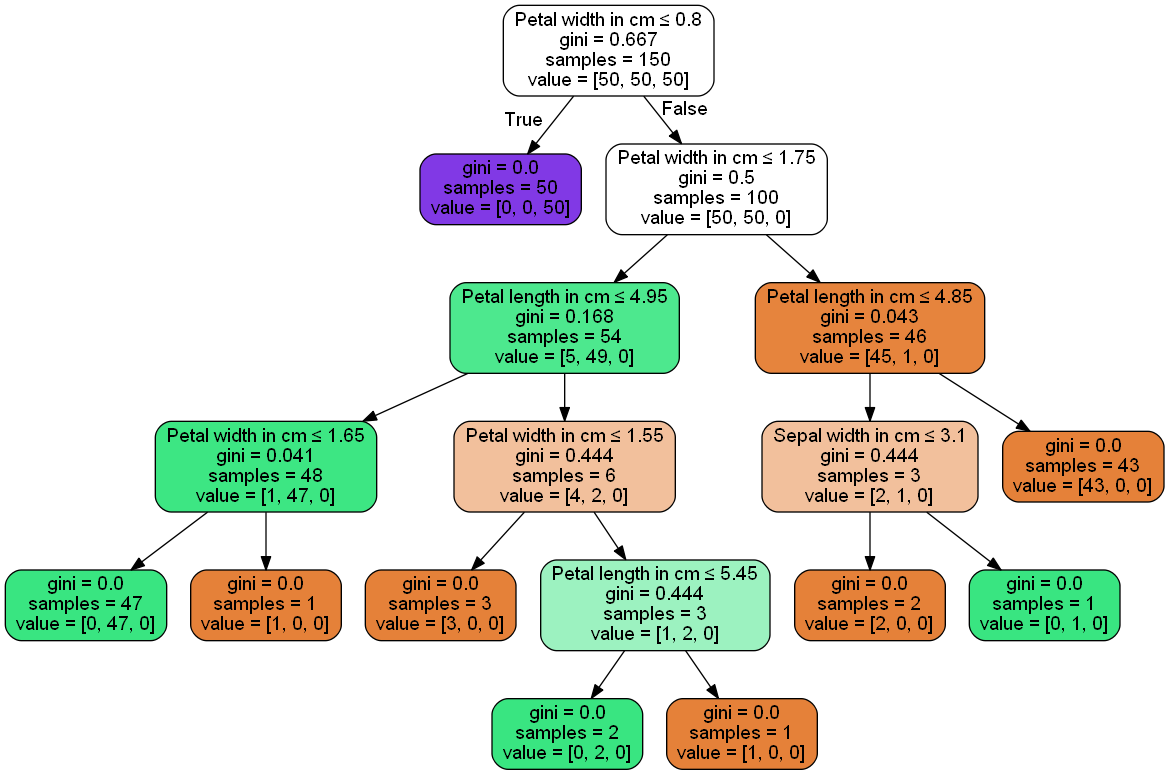

In [7]:
# Generate image from data
dot_data = StringIO()

export_graphviz(dtree,
                out_file=dot_data,
                feature_names=features,
                filled=True, rounded=True,
                special_characters=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
Image(graph.create_png())